/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


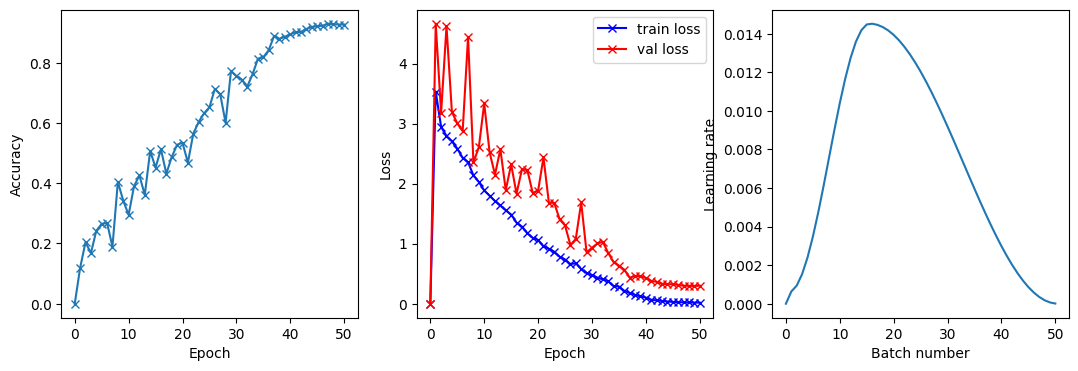

In [1]:
import misc
import pandas as pd

history = pd.read_csv('./output/resnet_20230219_013837.csv')
misc.plot_history(history)

In [1]:
import datasets.cub as cub
import datasets.flowers as flowers
from datasets.transforms import train_transform, test_transform
from torch.utils.data import DataLoader

datasets = cub.get_datasets(download=False)

train = DataLoader(datasets['train'], batch_size=64, shuffle=True)
unknown = DataLoader(datasets['test_unknown'], batch_size=64)
val = DataLoader(datasets['val'], batch_size=64)
known = DataLoader(datasets['test_known'], batch_size=64)

/home/bertie/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
len(datasets['test_unknown'])

2378

In [3]:
class_dict = dict()
for X,y in datasets['test_known']:
    if y in class_dict:
        class_dict[y] += 1
    else:
        class_dict[y] = 1

(array([ 7., 11., 19., 21., 39., 19., 21.,  7., 14.,  2.]),
 array([ 5. ,  6.5,  8. ,  9.5, 11. , 12.5, 14. , 15.5, 17. , 18.5, 20. ]),
 <BarContainer object of 10 artists>)

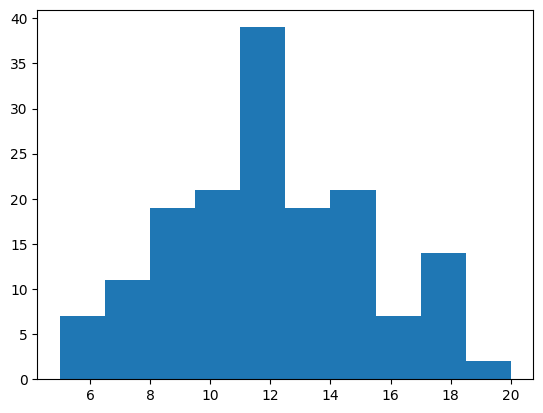

In [4]:
import matplotlib.pyplot as plt
class_dict
plt.hist(class_dict.values())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


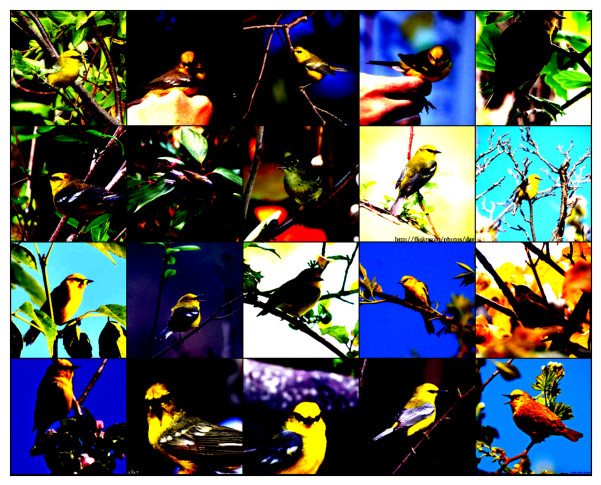

In [2]:
from utils import show_batch
show_batch(unknown)

In [3]:
from datasets.get_stats import get_stats

mean, std = get_stats(train)

100%|██████████| 103/103 [00:24<00:00,  4.20it/s]


In [4]:
print(mean, std)

tensor([-0.0009, -0.0006,  0.0001]) tensor([0.9994, 0.9992, 0.9992])
